El objetivo de esta práctica es familiarizarse con la asignatura, un primer contacto con Python y Pandas y, sobre todo, comprender qué se espera en cuanto a interpretación de datos. Para ello, vamos a obtener un índice de Smart City a partir de 6 indicadores para un conjunto de ciudades y además repreentaremos gráficamente dichos indicadores con la rueda de Boyd Cohen.

![](https://drive.google.com/uc?export=view&id=1l4IgUQ-DP6qljVrhxM3IgK6YS6hJRZK_)



Comenzaremos cargando las librerías y el dataset con el que vamos a trabajar. Debe comprobar que el dataframe df contiene 77 ciudades y 7 columnas, que incluyen el nombre de cada ciudad y los indicadores de Economía, Sociedad, Gobierno, Movilidad, Medio Ambiente y Calidad de Vida de cada una de ellas.

El indicador de la ciudad en cada categoría muestra qué orden ocupa en ese aspecto entre las 77 estudiadas de acuerdo a una serie de parámetros que no tienen que ver con esta práctica. Por ejemplo, Aalbord es la ciudad número 10 en Economía y la número 5 en gobierno. Evidentemente, cuanto mayor el indicador, peor la ciudad en ese aspecto en concreto.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Cargar el archivo XLS
url = 'https://github.com/crisurdiales/DataMining4SmartCities/raw/main/Paises.xlsx'
df = pd.read_excel(url, sheet_name='hoja1')
print(df.head())

            Ciudad  Economía  Sociedad  Gobierno  Movilidad  Medio Ambiente  \
0          AALBORG        10        11         5         14              14   
1           AARHUS         2         3         6          3              19   
2         ABERDEEN         8        25        52         42              43   
3           ANCONA        54        66        72         67              29   
4  BANSKA BYSTRICA        73        51        48         58              33   

   Calidad de vida  
0               10  
1               27  
2               32  
3               62  
4               48  


A continuación debe escalar los datos numéricos para que varíen entre 1 y 15, en lugar de entre 1 y 77, como están ahora mismo, o entre 0 y 1, que sería lo que haría una función de normalización estandar. Simplemente, busque el factor de escala apropiado y multiplique los datos por dicho factor. Deje los resultados en misDatosEscalados y compruebe que están apropiadamente escalados.

Por ejemplo, a AALBORG debe corresponde el vector [1.948052   2.142857   0.974026   2.727273  2.727273 1.948052]. Mantenga los nombres de columnas del df original (Economía, Sociedad, etc).

In [ ]:
# Escalar los datos
#INTRODUZCA AQUI SU CODIGO

                  Economía   Sociedad   Gobierno  Movilidad  Medio Ambiente  \
Ciudad                                                                        
AALBORG           1.948052   2.142857   0.974026   2.727273        2.727273   
AARHUS            0.389610   0.584416   1.168831   0.584416        3.701299   
ABERDEEN          1.558442   4.870130  10.129870   8.181818        8.376623   
ANCONA           10.519481  12.857143  14.025974  13.051948        5.649351   
BANSKA BYSTRICA  14.220779   9.935065   9.350649  11.298701        6.428571   

                 Calidad de vida  
Ciudad                            
AALBORG                 1.948052  
AARHUS                  5.259740  
ABERDEEN                6.233766  
ANCONA                 12.077922  
BANSKA BYSTRICA         9.350649  


Con los datos escalados, debe obtener el índice de cada ciudad sumando sus 6 indicadores y ordenarlas de forma ascendente en cuanto al índice, esto es, la primera ciudad tendrá el íncide más bajo y así sucesivamente. CiudadesOrdenadas debe tener dos columnas: Ciudad (con el nombre de la ciudad en cada fila) e Indice, con el índice de esa ciudad.

In [ ]:
# Calcular el índice de ciudades)
#INTRODUZCA AQUI SU CODIGO

         Ciudad     Indice
1        AARHUS  11.688312
0       AALBORG  12.467532
72        UMEAA  15.389610
24  JOENKOEPING  16.948052
65      TAMPERE  17.532468


Compruebe que todo está correcto observando que la fila 15 de ciudades ordenadas es REGENSBURG y su íncide es 22.59

In [ ]:
#INTRODUZCA AQUI SU CODIGO

Ciudad    REGENSBURG
Indice     22.597403
Name: 55, dtype: object


Pruebe también a obtener el índice de una ciudad concreta por nombre, esto es, cuando la columna 'Ciudad' toma un valor, por ejemplo, KAUNAS, compruebe que puede extraer el índice, que debería ser 67.01

In [ ]:
#INTRODUZCA AQUI SU CODIGO

67.01298701298703


A continuación, vamos a obtener la representación de Boyd-Cohen, esto es, una serie de hexágonos concéntricos donde cada eje desde el centro hacia un vértice representa un indicador y el perímetro de la figura que componen los vértices sería el íncide. Dado que los indicadores bajos suponen mejor posición en el ranking, la figura que componen las mejores ciudades tendría un área pequeña.

El código a continuación le permite dibujar los hexágonos (pintar_base()), dibujar una ciudad cualquiera sobre dichos hexágonos (pintar_ciudad(ax,ciudad, color)) y, si se desea, pintar varias ciudades en el mismo hexágono en distintos colores para compararlas. Para que funcione, deberá mantener los nombres y estructuras indicadas en todos los pasos que ha ejecutado o, si no lo hace así, modificar el código en Python adjunto. Observe que:

* pintar_base() devuelve los plots fig y ax, que usarán las otras funciones
* pintar_ciudad() tiene como parámetros el plot ax, que devuelve pintar_base(), el nombre de la ciudad a pintar (tal como aparece en el df original) y el color con que queremos representarlo (ver ciudades_colores).
* pintar_varias_ciudades(), que nos servirá para compararlas, lleva como parámetro los nombres de las ciudades y los colores para representarlas (ver ciudades_colores). Observe que empleamos la librería webcolors.name_to_hex para nombrar los colores, en lugar de indicarlos simplemente por su código hexadecimal. Los nombres son estandar y se pueden encontrar en cualquier búsqueda web.

IMPORTANTE: El código usa como ejemplo los nombres de tres ciudades al azar, pero interiormente está empleando las estructuras de datos que debería haber creado en los pasos anteriores. Si no lo ha hecho, no funcionará correctamente. Si su código es correcto, debería aparecer una figura como la que se muestra a continuación.

![](https://drive.google.com/uc?export=view&id=13Wn22Ox5BjS1NbtpOvgs28Wrq_rIssUj)


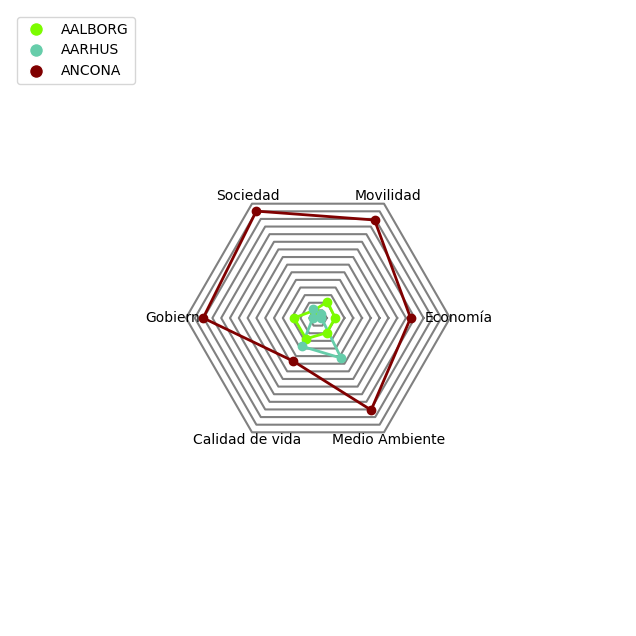

In [ ]:
#libreria para llamar por nombre a los colores en lugar de en hexadecimal
import webcolors


def pintar_base():
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-20, 50)
    ax.set_ylim(-20, 50)
    ax.set_aspect('equal')
    ax.axis('off')

    # Dibujar hexágonos concéntricos
    for size_hexagon in np.arange(1, 16, 1):  # Ajustado para un máximo de 15
        hexagon_x = [15 + size_hexagon * np.cos(np.pi * 2 * i / 6) for i in range(7)]
        hexagon_y = [15 + size_hexagon * np.sin(np.pi * 2 * i / 6) for i in range(7)]
        ax.plot(hexagon_x, hexagon_y, color='grey')
        # Colocar etiquetas solo en el hexágono exterior
        if size_hexagon == 15:
            for i, label in enumerate(['Economía', 'Movilidad', 'Sociedad', 'Gobierno', 'Calidad de vida', 'Medio Ambiente']):
                label_x = 15 + (size_hexagon + 1) * np.cos(np.pi * 2 * i / 6)
                label_y = 15 + (size_hexagon + 1) * np.sin(np.pi * 2 * i / 6)
                ax.text(label_x, label_y, label, ha='center', va='center')

    return fig, ax

def pintar_ciudad(ax, ciudad, color):
    # Extraer los valores de los indicadores para la ciudad específica
    valores = misDatosEscalados.loc[ciudad].values

    # Calcular las coordenadas de los puntos
    puntos_x = [15 + valor * np.cos(np.pi * 2 * i / 6) for i, valor in enumerate(valores)]
    puntos_y = [15 + valor * np.sin(np.pi * 2 * i / 6) for i, valor in enumerate(valores)]

    # Añadir los puntos al gráfico
    ax.scatter(puntos_x, puntos_y, color=color, zorder=5)

    # Unir los puntos con líneas poligonales
    puntos_x.append(puntos_x[0])  # Volver al primer punto para cerrar el polígono
    puntos_y.append(puntos_y[0])  # Volver al primer punto para cerrar el polígono
    ax.plot(puntos_x, puntos_y, color=color, linewidth=2, zorder=4)

def pintar_varias_ciudades(ciudades_colores):
    fig, ax = pintar_base()

    # Pintar cada ciudad con su color correspondiente
    for ciudad, color in ciudades_colores.items():
        pintar_ciudad(ax, ciudad, color)

    # Añadir leyenda
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in ciudades_colores.values()]
    labels = ciudades_colores.keys()
    ax.legend(handles, labels, loc='upper left')

    plt.show()

# Definir las ciudades y sus colores correspondientes
ciudades_colores = {
    'AALBORG': webcolors.name_to_hex('lawngreen'),
    'AARHUS': webcolors.name_to_hex('mediumaquamarine'),
    'ANCONA': webcolors.name_to_hex('maroon')
}

# Pintar varias ciudades
pintar_varias_ciudades(ciudades_colores)


En este gráfico se observa, por ejemplo, que Aalborg gana en índice al resto de ciudades, pero que Ancona es mucho peor que las otras dos. Sin embargo, se observa también que en calidad de vida Ancona se acerca a Aarhus. Esto casa con nuestra idea general de que en las ciudades mediterráneas (Ancona está en la costa italiana) se vive bien a pesar de todo, aunque estas afirmaciones habría que casarlas con referencias verificables, como comprobar la situación socioeconómica de Ancona o ver qué distancia tiene a nudos de transporte importantes. Aarhus, por otro lado, pierde en Medio Amnbiente con respecto a Aalborg, tal vez porque es la segunda ciudad más grande de Dinamarca o porque tiene un puerto industrial muy grande, si bien recientemente están moviéndose para mejorar este indicador.

Este tipo de análisis es el que se puede extraer de una rueda de Boyd Cohen, buscando el por qué de los indicadores más representativos (por altos o por bajos), una vez sabemos cuales son y, en su caso, comparándolos con otras ciudades. El objetivo final sería redactar informes a partir de los indicadores, referenciando lo que observamos a documentos oficiales, para que el gobierno de la ciudad pudiese tomar decisiones respecto a qué políticas implementar o donde invertir el dinero público.